## Week 2 Lab exercises

In this week we will use python to explore strange new worlds, to seek out new life and new civilisation, and to boldly code what no one has coded before. 

The goal is to familiarise yourself with using functions, loops, arrays and plotting in Python, and to illustrate some of the software carpentry points that we discussed in the lecture.

In [51]:
# first we import the libraries we need
import numpy as np
import matplotlib.pyplot as plt

# The following lines makes the plots appear in another window - if using AppsAnywhere they may appear
# in another window behind the notebook, and you may have to rearrange the desktop to see them. However, 
# I've commented it out because it doesn't always work. You can try it if you have time.
# %matplotlib 

# This makes the plots appear in the notebook
%matplotlib inline

### ACTIVITY 1: 
In the code below, change the line as marked (UPDATE ME) to get the asteroid data from the data file `asteroid_locations.dat` that is in the `/data` folder

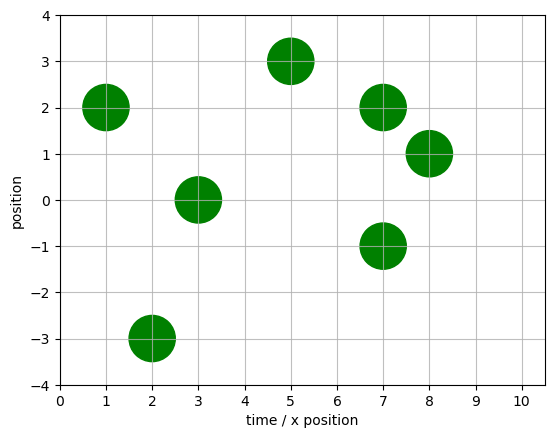

In [52]:
# Set up the plotting

def plot_asteroid_field(ax) :
    plt.axis([0,10.5,-4,4])
    major_ticks = np.arange(0, 11, 1)
    ax.set_xticks(major_ticks)
    plt.xlabel("time / x position")
    plt.ylabel("position")
    ax.set_aspect('equal')
    ax.grid(which='major', alpha=0.8)

    # Mark the asteroid positions onto the plot - read in the data from data/asteroid_locations.dat
    # HINT: the function you need is called loadtxt
    asteroid_locations = np.loadtxt("data/asteroid_locations.dat")
    for location in asteroid_locations :
        circle=plt.Circle(location, 0.5 , color='g')
        ax.add_artist(circle)
    #plt.pause(0.3)

# Test the plot
fig = plt.figure()
ax = plt.gcf().gca()
plot_asteroid_field(ax)
plt.show()

In [53]:
# set up a list to store the times and positions
list_of_times = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
list_of_y_positions = np.zeros_like(list_of_times)

# print off the initial values of the times and positions
print("The list of times at the start is ", list_of_times)
print("The list of y positions at the start is ", list_of_y_positions)

The list of times at the start is  [ 0  1  2  3  4  5  6  7  8  9 10]
The list of y positions at the start is  [0 0 0 0 0 0 0 0 0 0 0]


### ACTIVITY 2: 

Captain Katy has asked you to plot a flight path through the asteroid field. If you run the code below you will see that the path does not currently avoid the asteroids :-( Update it so that it does! 

Also update so that the distance moved is calculated, and try to minimise this.

RULES:

- Just like in a retro video game, the ship must move one step forward in the x direction at every timestep, and you can only change its movement in the y direction to avoid the asteroids.
- You should move in whole steps in the (x and) y direction, so you are always on integer coordinates.
- You must end the flight back at position y=0.
- Don't hit the asteroids! Note that their radius is 0.5 of a distance unit, so it is not sufficient to simply avoid the coordinates on which they are centred.

#### BUT FIRST

Remember *defensive programming*? You will see that the code does not check that it does what it should - i.e., it does not check that we have not hit an asteroid, and that we return to the zero position at the last step. Implement tests to check the rules _BEFORE_ you implement the code to set the path, and use asserts to make it quit with an error message if it fails.

*TIP: You probably want to write any tests as a separate function. Would it be better to call them at each step or just at the end?*

In [84]:
#Test First 
#Test should ensure that each rule is upheld

#Rule 1: We only move foreward in the x direction and only move up and down in the y direction 
def test_rocket_in_bounds(a_list_of_times, a_list_of_y_positions):
    for x,y in zip(a_list_of_times, a_list_of_y_positions):
        assert 0 <= x < 11, "Rocket position out of bounds!"
        assert -4 <= y < 4, "Rocket position out of bounds!"

#Rule 2: We move by 1 step in x direction and y direstion

#Rule 3: We end the trip at y=0

#Rule 4: We do not hit astroids 
def test_avoiding_obstacles(a_list_of_times,a_list_of_y_positions,asteroid_locations):
    for x, y in zip(a_list_of_times, a_list_of_y_positions):
        assert (x, y) not in asteroid_locations, "Hit an Asteroid!"

The list of times at the end is  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
The list of y positions at the end is  [ 0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0]


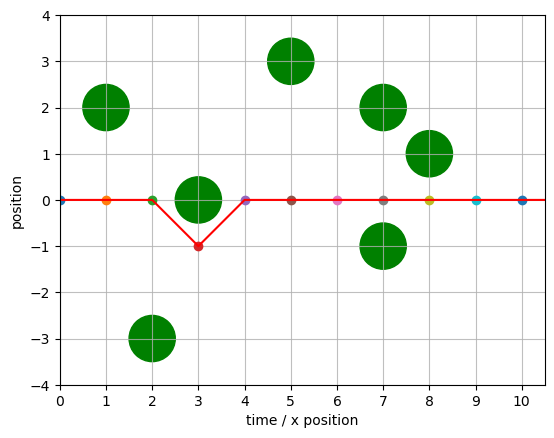

I moved a total of  0  units


In [88]:
# Plot again the asteroid field, so that we can plot the path on top of it
# plt.ion() # Make the plotting interactive so we can update the path as we fly
fig = plt.figure()
ax1 = plt.gcf().gca() #this stands for get current figure, get current axis
plot_asteroid_field(ax1)

# go through the list of times, where index is the index within the 
# list, and time_now is the entry at that index
for index, time_now in enumerate(list_of_times) :
    if (time_now == 3):
        step_size = -1
    

    elif (time_now == 4):
        step_size = 1

    elif (time_now == np.size(list_of_y_positions) -1):
         step_size = - list_of_y_positions[index - 1]

    else:
        step_size = 0

    if (index > 0) :
        list_of_y_positions[index] = list_of_y_positions[index - 1] + step_size
    
    else :
        list_of_y_positions[index] = 0
     
    position_now = list_of_y_positions[index]
    plt.plot(time_now, position_now, 'o')
    #plt.pause(0.3) # This pause just slows down the plotting so it looks nicer

print("The list of times at the end is ", list_of_times)
print("The list of y positions at the end is ", list_of_y_positions)

plt.plot(list_of_times, list_of_y_positions, 'r')
plt.show()

# Uncomment to save the figure
# plt.savefig("flight_path.png")

# Print out some information
total_distance_moved = 0 # UPDATE ME!
print("I moved a total of ", total_distance_moved, " units")

### ACTIVITY 3:

Now we are on an exploratory mission. Captian Katy wants you to plot a course for all of the blue (M or Minshara-class) planets on the map contained in `data/planet_locations.dat`, but not touching any of the other dangerous D-class pink planets. 

Again you need to update the code below to get the data from the data files.

How could the read-in of the data (in particular checking of the class of the planet) be improved?

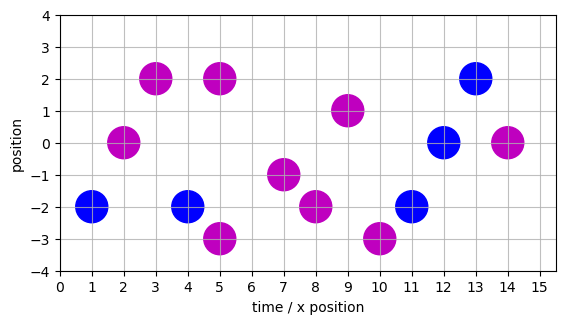

In [56]:
# Plot the planetary locations

def plot_planet_locations(ax) :
    plt.axis([0,15.5,-4,4])
    major_ticks = np.arange(0, 16, 1)
    ax.set_xticks(major_ticks)
    plt.xlabel("time / x position")
    plt.ylabel("position")
    ax.set_aspect('equal')
    ax.grid(which='major', alpha=0.8)

    # Mark the planet positions onto the plot - read in the data from data/planet_locations.dat
    # HINT: the function you need is called loadtxt
    planet_locations= np.loadtxt("data/planet_locations.dat")
    for index, location in enumerate(planet_locations) :
        is_minshara_class =  (location[2] == 1)
        coordinates = np.array([location[0],location[1]])
        if(is_minshara_class) :
            circle=plt.Circle(coordinates, 0.5, color='b')
            plt.gcf().gca().add_artist(circle)
        else : # other planets are dangerous D class planets
            circle=plt.Circle(coordinates, 0.5, color='m')
            plt.gcf().gca().add_artist(circle)  

# Test the plot
fig = plt.figure()
ax = plt.gcf().gca()
plot_planet_locations(ax)
plt.show()

### ACTIVITY 4:

Update the code below to make sure you visit all the M class planets as your Captain has asked (same rules of motion as above). What is the shortest distance in which you can do this? Update the code to calculate your value.

Again, you should _first write code that checks that the code does what it should_, and then implement the actual actions.

In [ ]:
# Test we need to run is, make sure we have hit all bule circles 



The list of times at the start is  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
The list of positions at the start is  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The list of times at the end is  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
The list of positions at the end is  [ 0 -2 -2 -2 -2  0  0  0  0  0  0 -2  0  2  2  0]


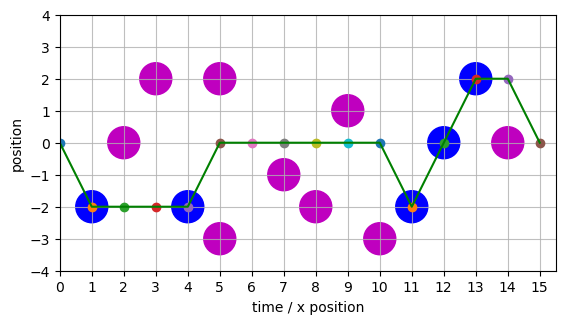

I moved a total of  0  units


In [70]:
# Plot again the asteroid field, so that we can plot the path on top of it

# Uncomment this to make the plotting interactive so we can update the path as we fly
# Need to also uncomment the %matplotlib command in the first cell, and plot.pause() below
# plt.ion()

# Regular plotting stuff
fig = plt.figure()
ax = plt.gcf().gca()
plot_planet_locations(ax)

# set up a list to store the times and positions
final_time = 15
list_of_times = np.arange(final_time+1)
list_of_y_positions = np.zeros_like(list_of_times)

# we want to track how much we have moved during the simulation
# so zero this
total_distance_moved = 0

# print off the initial values of the times and positions
print("The list of times at the start is ", list_of_times)
print("The list of positions at the start is ", list_of_y_positions)

# go through the list of times, where index is the index within the 
# list, and time_now is the entry at that index
for index, time_now in enumerate(list_of_times) :
    
    if time_now in [1, 11, 15]:
        step_size = -2
    
    elif time_now in [5, 12, 13]:
        step_size = 2
    
    else:
        step_size = 0

    if (index > 0) :
        list_of_y_positions[index] = list_of_y_positions[index - 1] + step_size
    
    else :
        list_of_y_positions[index] = 0

    position_now = list_of_y_positions[index]
    plt.plot(time_now, position_now, 'o')
    # Uncomment this for interactive version
    # plt.pause(0.4)

print("The list of times at the end is ", list_of_times)
print("The list of positions at the end is ", list_of_y_positions)

plt.plot(list_of_times, list_of_y_positions, 'g-')
plt.show()

# Uncomment to save the figure
#plt.savefig("myplot2.png")

# Calculate and print out some information
total_distance_moved = 0
print("I moved a total of ", total_distance_moved, " units")

### ACTIVITY 5:

Which software carpentry features are already implemented?

1. There are comments to help the reader know what is happening...
2. UPDATE ME
3. ...



### ACTIVITY 6:

*Timing*: the code is very short but it is still useful to time the `for` loop to see how long it is taking and understand how it could be optimised. Add something that returns the time taken for it to run. Change the pause time for the plotting and check that the time to run changes appropriately. (I would just google "how to time function in python").

### ACTIVITY 7:

Suggest other ways to improve the code. Free to use your imagination and suggest major changes (you don't need to implement them unless you want to).

1. UPDATE ME
2. ...

